# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools
import os

%matplotlib inline

import SISSOkit.evaluation as evl
import SISSOkit.plot as plot
import SISSOkit.notebook as nb
import SISSOkit.utils as utils
import SISSOkit.cross_validation as cv

pd.options.display.max_columns, pd.options.display.max_rows = None,None

# Access to SISSO Results

In SISSOkit, firstly you need to instantiate 4 basics class `Regression`, `RegressionCV`, `Classification`, `ClassificationCV` in module `SISSOkit.evaluation`.

In general, you only need to pass path to the SISSO result directory as the argument for instantiating.

In [2]:
regression=evl.Regression('/home/xu/Desktop/newIP/T/r2_MT_r=2')
regressionCV=evl.RegressionCV('/home/xu/Desktop/newIP/T/r2_MT_r=2_cv')

For CV class, you can also return a specific result as non-CV class by index.

In [3]:
type(regressionCV[0])

SISSOkit.evaluation.Regression

# Checking Input Information

All the input information are saved as class's attributes, including:
1. all arguments in `SISSO.in` except for `ptype`, which is signified by class name.
1. data set
1. validation set (only for CV)

For more information, please find in the documentation.

**If one attribute has many dimension, remember the index is always in the order of CV index, task, dimension, sample.**

In [4]:
regressionCV.n_sample[:2]

array([[43, 43],
       [43, 43]])

In [5]:
regressionCV.operation_set

['+', '-', '*', '/', 'exp', 'log', '^-1', '^2', '^3', 'sqrt', 'cbrt', '|-|']

In [6]:
regression.data.head(2)

,Material,r2,mass_A,mass_B,number_A,number_B,period_A,period_B,atomic_homo_A,atomic_homo_B,atomic_lumo_A,atomic_lumo_B,EA_A,EA_B,IP_A,IP_B,rs_A,rs_B,rp_A,rp_B,rd_A,rd_B,bond_length,volume,Cv_300,Cv_600,debye_freq
0,AgBr,0.688960,107.8682,79.904,47,35,5,4,-4.419473,-7.852589,-4.419473,0.165222,-1.499063,-3.669322,7.746149,12.553645,1.3174,0.7514,1.8871,0.8831,0.5489,0.2281,2.837551,45.694211,49.195543,49.712180,2.527331
1,AgCl,0.657872,107.8682,35.450,47,17,5,3,-4.419473,-8.560230,-4.419473,0.136532,-1.499063,-3.906766,7.746149,13.835604,1.3174,0.6782,1.8871,0.7568,0.5489,2.2374,2.724373,40.441715,48.670028,49.576175,2.321504


In [7]:
regression.materials.head(2)

0    AgBr
1    AgCl
Name: Material, dtype: object

In [8]:
regression.features_name[:2]

['mass_A', 'mass_B']

In [9]:
regressionCV.validation_data[0].head(2)

,Material,r2,mass_A,mass_B,number_A,number_B,period_A,period_B,atomic_homo_A,atomic_homo_B,atomic_lumo_A,atomic_lumo_B,EA_A,EA_B,IP_A,IP_B,rs_A,rs_B,rp_A,rp_B,rd_A,rd_B,bond_length,volume,Cv_300,Cv_600,debye_freq
0,CaTe,0.937165,40.0780,127.600,20,52,4,5,-3.763574,-5.965366,-1.954997,0.294420,0.163377,-2.585965,6.305401,9.753922,1.7997,0.9492,2.3018,1.1487,0.6753,0.4293,3.149244,62.466763,48.267637,49.472892,4.354404
1,RbH,0.880003,85.4678,1.008,37,1,5,1,-2.222718,-6.331686,-2.222718,-6.331686,-0.564344,-1.727703,4.069115,12.242355,2.3195,0.5521,3.2347,1.3786,2.4090,1.0580,2.962128,51.980603,39.077221,46.424030,8.186112


For basic analysis on data set, there is attributes `baseline`, which is the model predicting all property as mean value.

In [10]:
regression.baseline

mean         0.797462
std          0.137030
MAE          0.109930
25%ile AE    0.054970
50%ile AE    0.095785
75%ile AE    0.141858
95%ile AE    0.272585
MaxAE        0.442642
dtype: float64

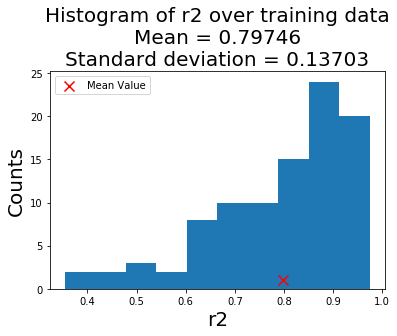

In [11]:
plot.baselineplot(regression)

# Information about output

Descriptors, coefficients and intercepts are also seen as attributes.

In [12]:
regression.descriptors[:2]

[['(((EA_A)^2/(rp_A-rs_A)))'],
 ['(((EA_A)^2/(rp_A-rs_A)))', '((log(rs_A)/(volume*debye_freq)))']]

In [13]:
regression.coefficients

[[[-0.06210553724],
  [-0.07307065277, -28.3240558],
  [-0.06634218903, 24.02732897, -0.1132063683],
  [-0.07216076926, 0.01553559751, -0.709294764, 1.697221505e-07],
  [-0.07220364646,
   -0.0259091673,
   -0.6978779728,
   1.764004806e-07,
   0.05713759499]],
 [[-0.09980667112],
  [-0.1193397365, -50.45597868],
  [-0.107946029, 44.23957825, -0.1937923491],
  [-0.1188452202, 0.02960479251, -1.16440443, 2.946591221e-07],
  [-0.1192756944, -0.05042077902, -1.16329019, 3.075614878e-07, 0.1507028272]]]

In [14]:
regression.intercepts

[[0.9241377367, 0.9963958222, 0.9853276545, 1.021033258, 1.020207997],
 [0.839320924, 0.9680402164, 0.9529635461, 1.025216704, 1.027267369]]

You can get feature percent by calling `features_percent()`.

Feature percent is the percentage of each feature in top `sub_sis` 1D descriptors.

For example, if you set `sub_sis=100` in `SISSO.in`, and SISSO result shows that feature `A` appears in 30 descriptors out of the top 100 (`sub_sis`) features in `./feature_space/Uspace.name`, then the percentage of feature `A` is 30%.

In [15]:
regression.features_percent()

,percent
EA_A,1
IP_A,0.19
rs_A,0.15
rs_B,0.15
atomic_homo_A,0.14
bond_length,0.14
IP_B,0.13
Cv_600,0.12
period_A,0.11
atomic_homo_B,0.1


Predictions, errors are saved as file after SISSO finishes computing. But SISSOkit computes them from scratch instead of reading data from the files, in which way it is easy for predict bsaed on extra data set.

You can access by calling the methods `predictions()` and `errors()`. For CV, you can set `training` to decide whether it is in training mode or validation mode, i.e. predictions and errors based on `train.dat` or `validation.dat`.

In [16]:
regression.predictions()[0][:2]

array([0.67916159, 0.67916159])

In [17]:
regression.errors()[0][:2]

array([-0.00979798,  0.02128914])

You can call `total_errors()` to see the analysis of errors.

In [18]:
regressionCV.total_errors(training=False)

,RMSE,MAE,25%ile AE,50%ile AE,75%ile AE,95%ile AE,MaxAE
1,0.086202,0.062159,0.024310,0.048400,0.080375,0.153432,0.442786
2,0.068385,0.047836,0.014511,0.033391,0.064943,0.152630,0.252725
3,0.103053,0.050751,0.012620,0.028510,0.056195,0.177854,1.229585
4,0.130279,0.053173,0.011330,0.028973,0.058037,0.165975,1.734243
5,0.091440,0.046904,0.011597,0.024928,0.057562,0.142395,0.926168


Sometimes MaxAE is too large, we can find which material and which CV index cause it by calling `find_max_error()`.

In [19]:
regressionCV.find_max_error()

(['BeO', 'BaO', 'CsH', 'CsH', 'CsH'], [34, 28, 12, 12, 12])

We want to check which descriptor leads to such a huge error, we can call `check_predictions()`.

In [20]:
regressionCV.check_predictions(cv_idx=12,dimension=3,training=False,multiply_coefficients=True)

array([[ 9.87125390e-01, -5.05208362e-03, -4.85975441e-02,
        -6.07528504e-05],
       [ 9.87125390e-01, -3.43435803e-02, -1.77045324e-02,
        -2.88361756e-02],
       [ 9.87125390e-01, -5.05208362e-03, -4.73399712e-02,
        -6.47506561e-04],
       [ 9.87125390e-01, -3.07526754e-02, -1.23663963e-01,
        -3.26581413e-05],
       [ 9.87125390e-01, -3.56033096e-03, -3.85331312e-02,
        -3.26961828e-04],
       [ 1.01532237e+00, -5.34233639e-02, -4.49274878e-02,
        -1.36377573e+00],
       [ 1.01532237e+00, -1.92872941e-01, -3.31845063e-02,
        -1.11272648e-01],
       [ 1.01532237e+00, -5.96614624e-02, -3.95050216e-02,
        -4.54591911e-01],
       [ 1.01532237e+00, -5.50000799e-02, -6.69648724e-02,
        -9.57746780e-03],
       [ 1.01532237e+00, -4.04874964e-02, -4.10758013e-02,
        -9.09183821e-01]])

Now we want to drop CV12 results because it ruins the results. We can call `drop([12])` to drop it, and it will return a new `RegressionCV` instance without this CV file. Or we can instantiate from the beginning by pass `drop=[12]` as an argument to it.

In [21]:
regressionCV.drop([12]).total_errors(training=False)

,RMSE,MAE,25%ile AE,50%ile AE,75%ile AE,95%ile AE,MaxAE
1,0.087084,0.062941,0.024892,0.049214,0.080742,0.153899,0.442786
2,0.068657,0.047727,0.014427,0.032942,0.063772,0.156886,0.252725
3,0.067375,0.044716,0.011959,0.028510,0.055193,0.152340,0.321317
4,0.066709,0.044627,0.011232,0.029156,0.058034,0.153414,0.296989
5,0.059577,0.040420,0.011782,0.024741,0.055264,0.124377,0.316290


If we want to predict the property of new data set using the models we get, we can simply call `predict()`.

In [22]:
regression.predict(regression.data.iloc[:2,:])

array([[0.67916159, 0.67916159],
       [0.64055839, 0.6250046 ],
       [0.68371385, 0.65618984],
       [0.67552119, 0.68206019],
       [0.67231142, 0.68019504]])

In the following, there are some plot in mdule `plot`.

If we want to see different dimension, we can call `abs_errors_vs_dimension()`.

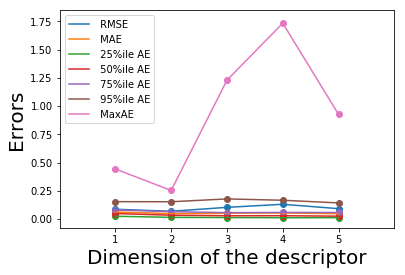

In [23]:
plot.abs_errors_vs_dimension(regressionCV,training=False)

Or if we want to see more details.

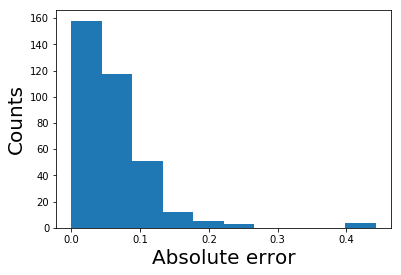

In [24]:
plot.error_hist(1,regressionCV,training=False,absolute=False)

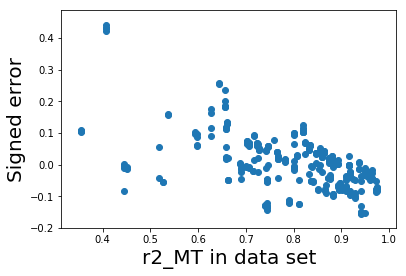

In [25]:
plot.prediction_vs_property(1,regressionCV,training=False)

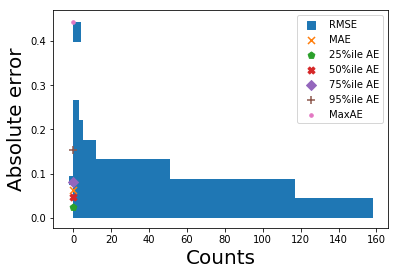

In [26]:
plot.hist_with_markers(1,regressionCV,training=False)

Or we can simply plot using `errors_details()` to include these 3 plots above and different dimension of descriptor.

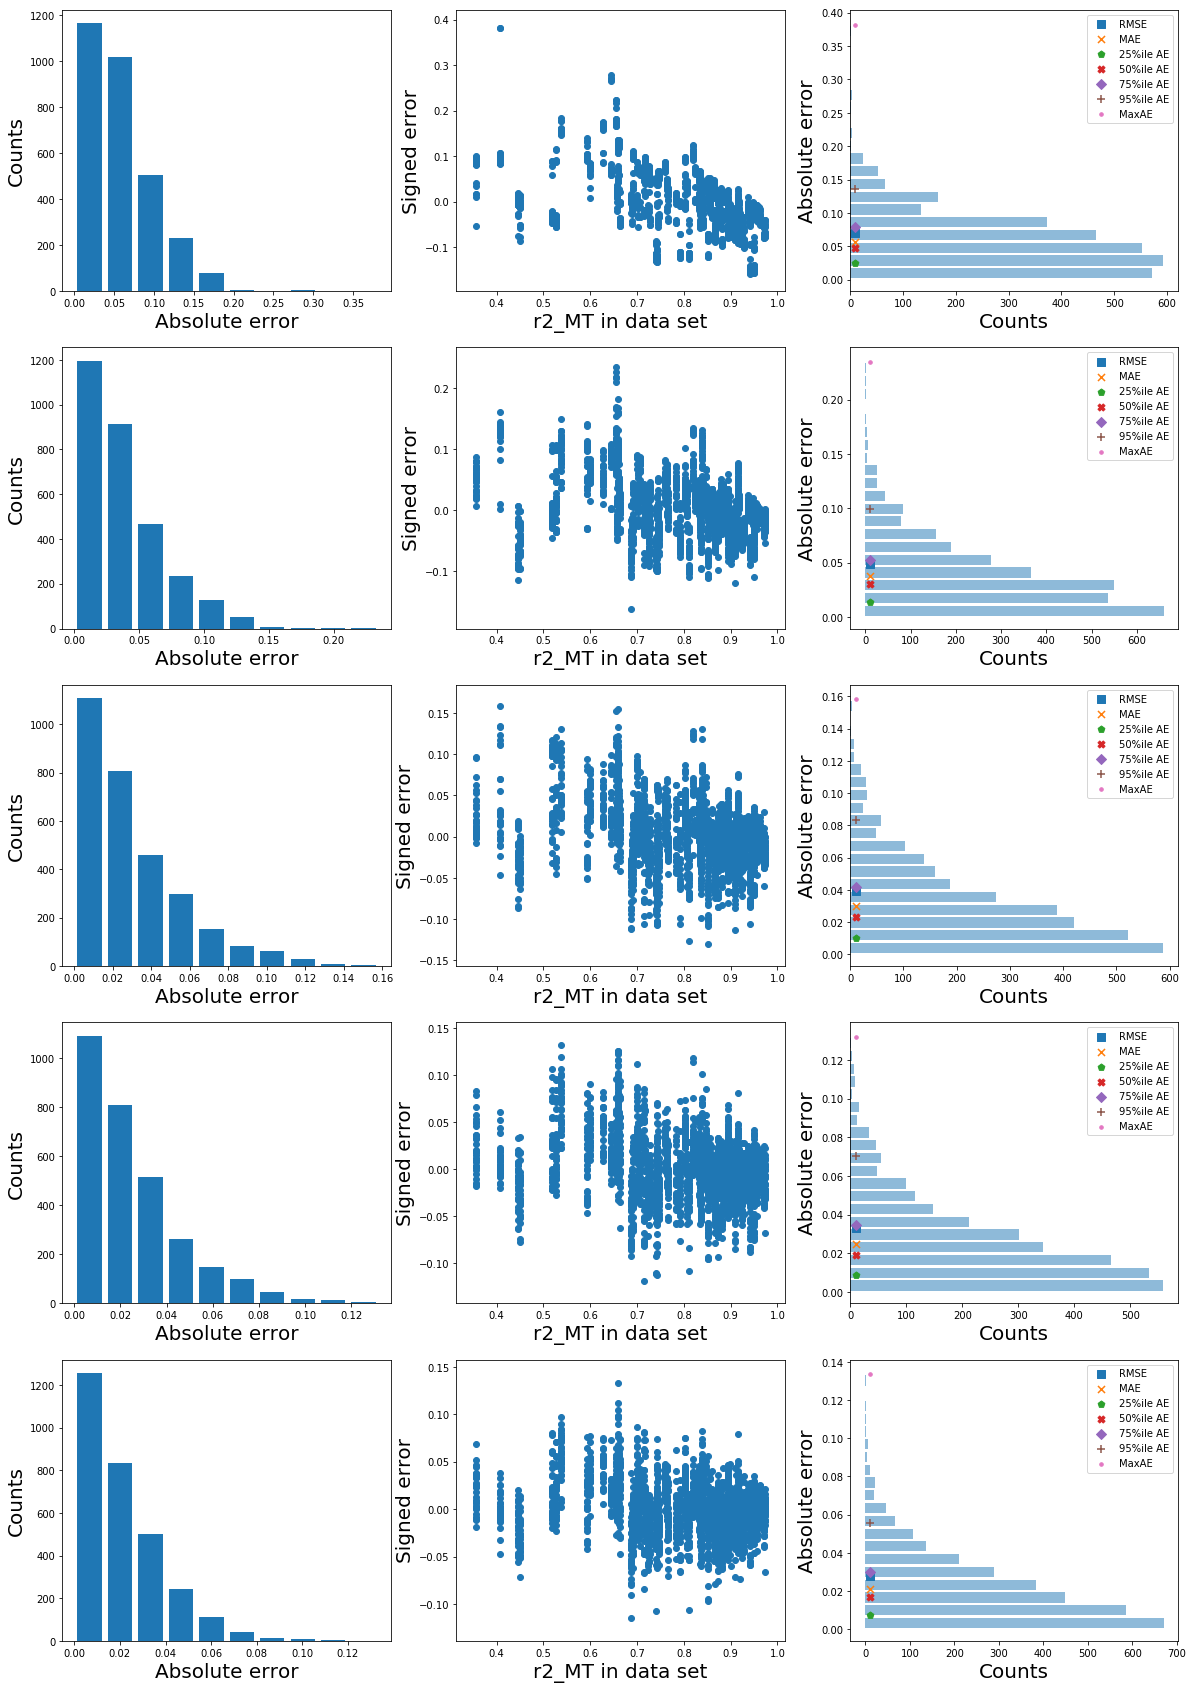

In [27]:
plot.errors_details(regressionCV)

And we can see outliers with `boxplot()`.

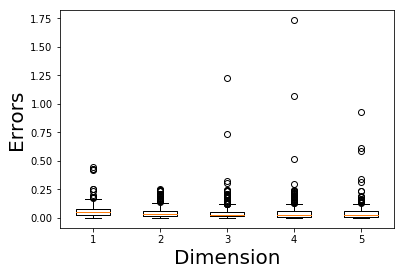

In [28]:
plot.boxplot(regressionCV,training=False)